<h2> «Six-step Statistical Investigation»
    
    1. Research question
    2. Design a study and collect data
    3. Explore the data
    4. Draw inferences
    5. Formulate conclusions
    6. Look back and ahead

<h3> 1. Research question

<h3> 2. Design a study and collect data
    
    Data was obtained via ICNF (Instituto da Conservação da Natureza e Florestas) website and collected from ANPC (Autoridade Nacional de Proteção Civil).
    The data includes information on wildfires occuring in Portugal in the period of 2015 year.

<h3> 3. Explore the data

In [8]:
import pandas as pd
from dateutil import parser
import numpy as np
import math
import statistics as st
from scipy import stats as stat
import matplotlib
import seaborn as sns

In [79]:
df = pd.read_excel('Lista Incendios_2015.xlsx')
df['Count'] = 1
df

,Ano,Codigo SGIF,Codigo_ANPC,Tipo,Distrito,Concelho,Freguesia,Local,INE,x,...,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,Região PROF,UGF,Count
0,2015,DM315252,2015160007544,Florestal,Viana do Castelo,Ponte de Lima,Serdedelo,VALE DE TROVELA (SERDEDELO),160746,167814,...,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Alto Minho,1
1,2015,DM215305,2015130043758,Florestal,Porto,Marco de Canaveses,Vila Boa de Quires,LUGAR DO FOFO,130731,193731,...,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Tâmega,1
2,2015,DM415293,2015030021973,Florestal,Braga,Vila Verde,Lage,RUA PROF ABEL MADEIRA,31323,172162,...,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho,1
3,2015,DM315261,2015160007563,Falso Alarme,Viana do Castelo,Ponte de Lima,Boalhosa,J. DEPOSITOS DE AGUA (BOALHOSA),160709,171291,...,0,0,0,NaN,NaN,630.0,Desconhecida,Entre Douro e Minho,Alto Minho,1
4,2015,BL115321,2015180015874,Agrícola,Viseu,Castro Daire,Castro Daire,Farejinhas - Bº das Queirós,180304,217299,...,1,0,0,NaN,NaN,630.0,Desconhecida,Beira Litoral,Dão Lafões,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23170,2015,DM4151671,2015030056919,Florestal,Braga,Fafe,Fafe,RUA DE FORNELO,30709,196478,...,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho,1
23171,2015,BL1151018,2015180041997,Florestal,Viseu,Cinfães,Cinfães,Ventuzela,180403,203110,...,0,1,0,NaN,NaN,125.0,Negligente,Entre Douro e Minho,Tâmega,1
23172,2015,BL3151227,2015010055691,Falso Alarme,Aveiro,Santa Maria da Feira,Feira,avenida 25 de abril,10906,164395,...,0,0,0,NaN,NaN,NaN,NaN,Entre Douro e Minho,AMP e Entre Douro e Vouga,1
23173,2015,DM2153226,2015130115988,Florestal,Porto,Paços de Ferreira,Paços de Ferreira,Lugar alto das Cavadas,130912,180666,...,1,0,0,NaN,NaN,711.0,Reacendimento,Entre Douro e Minho,Tâmega,1


In [80]:
# Para apagar registos com NULL values nas colunas mencinadas
df = df.dropna(how='any', subset=['x', 'y', 'lat', 'lon', 'DataAlerta', 'HoraAlerta', 'DataExtincao', 
                                  'HoraExtincao', 'Data1Intervencao', 'Hora1Intervencao'], axis=0)
# Seleccionar apenas os reacendimento e excluir falsos alarmes
reacendimentos = df.loc[df['TipoCausa'] == 'Reacendimento']
reacendimentos = reacendimentos[reacendimentos.Tipo != 'Falso Alarme']

In [81]:
# Check se todos os NULL foram retirados para as variáveis de interesse
df.apply(lambda x: sum(x.isnull()), axis=0)

Ano                                        0
Codigo SGIF                                0
Codigo_ANPC                                0
Tipo                                       0
Distrito                                   0
Concelho                                   0
Freguesia                                  0
Local                                      0
INE                                        0
x                                          0
y                                          0
lat                                        0
lon                                        0
DataAlerta                                 0
HoraAlerta                                 0
DataExtincao                               0
HoraExtincao                               0
Data1Intervencao                           0
Hora1Intervencao                           0
FonteAlerta                            21948
NUT                                        0
AA_Povoamento (ha)                         0
AA_Mato (h

In [82]:
ocorrencias_por_distrito = reacendimentos.groupby('Distrito').count().sort_values(['Count'], 
                                                                                  ascending=False)['Count']
ocorrencias_por_distrito

Distrito
Porto               499
Braga               254
Viana do Castelo    227
Viseu               184
Aveiro               86
Bragança             51
Vila Real            47
Guarda               43
Leiria               37
Coimbra              30
Santarém             26
Setúbal               9
Viana Do Castelo      4
Portalegre            3
Lisboa                3
Faro                  3
Beja                  1
Évora                 1
Name: Count, dtype: int64

De seguida vamos calcular o tempo de extinção e de intervenção.
Os dados vão ser classificados com duas variáveis qualitativas:
- Litoral / Interior:
    Reacendimentos que ocorreram em zonas de litoral de Portugal ou no interior. Como zonas de litoral assume-se localizações com longitude superior a 8:10:0.
- Maiores_Ocorrencias / Menores_Ocorrencias
    Classificando os reacendimentos localizados nos distritos com maior número de ocorrências ou com menor número de ocorrências. Como distritos com maior número de ocorrências entende-se distritos com número de ocorrências superior a 100.

In [83]:
# Calcular o tempo de intervenção e tempo de extinção
# Adicionar coluna 'Litoralidade'
# Adicionar coluna 'Ocorrencias'

tempo_intervencao = [None] * (len(reacendimentos.index))
tempo_extincao = [None] * (len(reacendimentos.index))
litoralidade = [None] * (len(reacendimentos.index))
ocorrencias = [None] * (len(reacendimentos.index))
for i in range(len(reacendimentos.index)):
    long = str(reacendimentos.iloc[i,12])
    if long[0:7] >= '8:10:0':
        litoralidade[i] = 'Litoral'
    if long[0:7] < '8:10:0':
        litoralidade[i] = 'Interior'
    if ocorrencias_por_distrito[reacendimentos.iloc[i,4]] > 100:
        ocorrencias[i] = 'Maiores_Ocorrencias'
    else:
        ocorrencias[i] = 'Menores_Ocorrencias'
        
        
    data_alerta = parser.parse(str(reacendimentos.iloc[i,13][:10]) + ' ' + str(reacendimentos.iloc[i,14]))
    data_int = parser.parse(str(reacendimentos.iloc[i,17][:10]) + ' ' + str(reacendimentos.iloc[i,18]))
    data_ext = parser.parse(str(reacendimentos.iloc[i,15][:10]) + ' ' + str(reacendimentos.iloc[i,16]))
    tempo_intervencao[i] = (str(abs(data_int - data_alerta)))
    tempo_extincao[i] = (str(abs(data_ext - data_int)))
        
reacendimentos.insert(15, "Tempo_Extincao", tempo_extincao , True)
reacendimentos.insert(16, "Tempo_Intervencao", tempo_intervencao , True)
reacendimentos.insert(17, "Litoralidade", litoralidade , True)
reacendimentos.insert(18, "Ocorrencias", ocorrencias, True)

# Para converter as colunas para timedelta:
reacendimentos['Tempo_Extincao'] = reacendimentos['Tempo_Extincao'].apply(lambda x: 
                                                                        pd.to_timedelta(x)).copy()
reacendimentos['Tempo_Intervencao'] = reacendimentos['Tempo_Intervencao'].apply(lambda x: 
                                                                              pd.to_timedelta(x)).copy()

        

<h4> Cleaned data
    
    From the original dataset, the following dataframe will be used

In [85]:
# Simplificação do dataframe de reacendimento para incluis apenas as variáveis de interesse
reacendimentos_slim = reacendimentos.loc[:,[ 'Litoralidade', 'Ocorrencias', 'Tempo_Extincao',
                                            'Tempo_Intervencao', 'AA_Total (pov+mato+agric) (ha)' ]]
reacendimentos_slim =  reacendimentos_slim.rename(columns = {'AA_Total (pov+mato+agric) (ha)': 'AA_total_ha'})

reacendimentos_slim

,Litoralidade,Ocorrencias,Tempo_Extincao,Tempo_Intervencao,AA_total_ha
5,Litoral,Maiores_Ocorrencias,0 days 07:35:00,0 days 00:12:00,1.500
15,Interior,Menores_Ocorrencias,0 days 00:50:00,0 days 00:20:00,0.100
43,Litoral,Maiores_Ocorrencias,0 days 00:58:00,0 days 00:04:00,0.050
145,Interior,Maiores_Ocorrencias,0 days 03:53:00,0 days 00:20:00,0.100
237,Litoral,Maiores_Ocorrencias,0 days 02:54:00,0 days 00:05:00,0.200
...,...,...,...,...,...
23130,Interior,Maiores_Ocorrencias,0 days 02:18:00,0 days 00:12:00,0.045
23143,Litoral,Maiores_Ocorrencias,0 days 00:51:00,0 days 00:14:00,0.100
23145,Litoral,Maiores_Ocorrencias,0 days 02:25:00,0 days 00:06:00,0.300
23167,Litoral,Maiores_Ocorrencias,0 days 02:57:00,0 days 00:16:00,0.070


In [86]:
# reacendimentos_slim com tempo em segundos

reacendimentos_slim_delta = reacendimentos_slim.copy()
reacendimentos_slim_delta['Tempo_Extincao'] = reacendimentos_slim_delta['Tempo_Extincao'].astype('int64') // 10**9
reacendimentos_slim_delta['Tempo_Intervencao'] = reacendimentos_slim_delta['Tempo_Intervencao'].astype('int64') // 10**9
reacendimentos_slim_delta

,Litoralidade,Ocorrencias,Tempo_Extincao,Tempo_Intervencao,AA_total_ha
5,Litoral,Maiores_Ocorrencias,27300,720,1.500
15,Interior,Menores_Ocorrencias,3000,1200,0.100
43,Litoral,Maiores_Ocorrencias,3480,240,0.050
145,Interior,Maiores_Ocorrencias,13980,1200,0.100
237,Litoral,Maiores_Ocorrencias,10440,300,0.200
...,...,...,...,...,...
23130,Interior,Maiores_Ocorrencias,8280,720,0.045
23143,Litoral,Maiores_Ocorrencias,3060,840,0.100
23145,Litoral,Maiores_Ocorrencias,8700,360,0.300
23167,Litoral,Maiores_Ocorrencias,10620,960,0.070


<h3> Statistical summary for quantitative data

In [87]:
stat_summary = reacendimentos_slim_delta.describe()
stat_summary.loc['range'] = stat_summary.loc['max'] - stat_summary.loc['min']
stat_summary.loc['IQR'] = stat_summary.loc['75%'] - stat_summary.loc['25%'] # appending interquartile range
stat_summary.loc['G.M.'] = stat.gmean(reacendimentos_slim_delta.iloc[:,2:], axis=0)
stat_summary.loc['H.M.'] = stat.hmean(reacendimentos_slim_delta.iloc[:,2:], axis=0)
mode = reacendimentos_slim_delta.mode(numeric_only=True, axis=0)
stat_summary.loc['var'] = reacendimentos_slim_delta.var(numeric_only=True, axis=0)
stat_summary.loc['median'] = reacendimentos_slim_delta.median( numeric_only=True, axis=0)
stat_summary.loc['skew'] = reacendimentos_slim_delta.skew(numeric_only=True, axis=0)
stat_summary.loc['kurt'] =  reacendimentos_slim_delta.kurt(numeric_only=True, axis=0)
stat_summary.loc['mad'] = reacendimentos_slim_delta.mad(axis=0)

stat_summary = pd.concat([stat_summary, mode], axis=0)
stat_summary.rename(index ={0: 'mode'}, inplace = True)

stat_summary

C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


,Tempo_Extincao,Tempo_Intervencao,AA_total_ha
count,1.508000e+03,1508.000000,1508.000000
mean,8.337772e+03,725.490716,3.233140
std,1.310108e+04,888.986859,37.216702
min,3.000000e+02,0.000000,0.000050
25%,3.720000e+03,360.000000,0.010000
50%,6.180000e+03,600.000000,0.050000
75%,9.600000e+03,900.000000,0.302500
max,3.291000e+05,25200.000000,1105.000000
range,3.288000e+05,25200.000000,1104.999950
IQR,5.880000e+03,540.000000,0.292500


In [89]:
# Resultados em timedelta
stat_summary_final = stat_summary.copy()
stat_summary_final['Tempo_Extincao'] = stat_summary['Tempo_Extincao'].apply(lambda x: x*10**9).copy()
stat_summary_final['Tempo_Intervencao'] =stat_summary['Tempo_Intervencao'].apply(lambda x: x*10**9).copy()

stat_summary_final_delta = stat_summary_final.copy()
stat_summary_final_delta['Tempo_Extincao'] = stat_summary_final_delta['Tempo_Extincao'].apply(lambda x: pd.to_timedelta(x)).copy()
stat_summary_final_delta['Tempo_Intervencao'] = stat_summary_final_delta['Tempo_Intervencao'].apply(lambda x: pd.to_timedelta(x)).copy()
# stat_summary_final.delta

stat_summary_final_delta

,Tempo_Extincao,Tempo_Intervencao,AA_total_ha
count,0 days 00:25:08,0 days 00:25:08,1508.000000
mean,0 days 02:18:57.771883289,0 days 00:12:05.490716180,3.233140
std,0 days 03:38:21.081607726,0 days 00:14:48.986859078,37.216702
min,0 days 00:05:00,0 days 00:00:00,0.000050
25%,0 days 01:02:00,0 days 00:06:00,0.010000
50%,0 days 01:43:00,0 days 00:10:00,0.050000
75%,0 days 02:40:00,0 days 00:15:00,0.302500
max,3 days 19:25:00,0 days 07:00:00,1105.000000
range,3 days 19:20:00,0 days 07:00:00,1104.999950
IQR,0 days 01:38:00,0 days 00:09:00,0.292500


<h3> Plotting grahics for number of occurences

Text(0.5, 0, 'District')

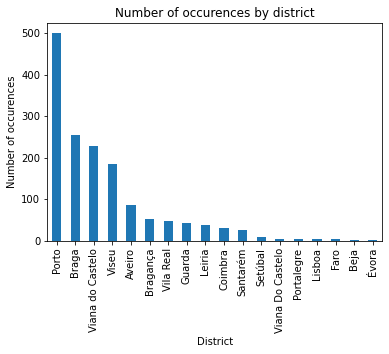

In [66]:
a = ocorrencias_por_distrito
a.plot.bar()

matplotlib.pyplot.title('Number of occurences by district')
matplotlib.pyplot.ylabel('Number of occurences')
matplotlib.pyplot.xlabel('District')

Text(0, 0.5, 'Number of ccorrences')

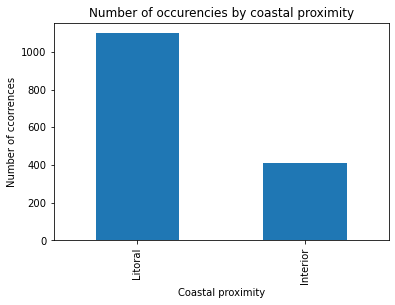

In [68]:
b = reacendimentos.groupby(['Litoralidade']).count()['Count'].sort_values(ascending=False)
b.plot.bar()

matplotlib.pyplot.title('Number of occurencies by coastal proximity')
matplotlib.pyplot.xlabel('Coastal proximity')
matplotlib.pyplot.ylabel('Number of ccorrences')

<h3> Plotting histograms

In [ ]:
c = 